**Clientes Inadimplentes: Uma análise python para identificar suas características**

Neste exercício analisaremos uma base de clientes de uma instituição financeira e tentaremos visualizar e correlacionar fatores que nos ajudem a entender o comportamento de clientes inadimplentes, para que no futuro seja possível traçarmos estratégias visando reduzir a sua proporção.  

**1- EXPLORAÇÃO DE DADOS**

In [1]:
#Importando todas as bibliotecas que utilizaremos no exercício

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Lendo arquivo que analisaremos

df = pd.read_csv("https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv", na_values="na")

#Verificando se leu corretamente

df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [2]:
#Verificando tamanho do dataframe
df.shape

(10127, 16)

In [3]:
#Verificando a quantidade de adimplentes e inadimplentes

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(qtd_total,qtd_adimplentes,qtd_inadimplentes)

#Calculando a representatividade de cada um

rep_adimplentes = qtd_adimplentes/qtd_total

print(f"A proporcão clientes adimplentes é de " + \
 f"{round(100*rep_adimplentes,2)}%"
 )
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100*(1-rep_adimplentes),2)}%"
 )


10127 8500 1627
A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [4]:
#Verificando conteúdo - Objects

df.select_dtypes('object').describe().transpose()

#Aqui percebemos que as colunas 'escolaridade', 'estado_civil' e 'salario_anual' possuem
#menos registros do que o comum, indicando que alguns deles possuem registros vazios.

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [5]:
#Verificando conteúdo - Numericos

df.drop('id',axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [6]:
#Verificando tipos das colunas
df.dtypes

#Aqui percebemos que as colunas 'valor_transacoes_12m' e 'limite_credito' estão sendo
#classificadas como 'object' ao invés de um número. Isso precisará ser tratado, pois,
#da forma atual, não conseguimos realizar contas matemáticas com essas colunas.

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [7]:
#Verificando dados faltantes

df.isna().any()

#Como imaginado, as colunas 'escolaridade', 'estado_civil' e 'salario_anual' de fato possuem
#valores vazios 'na' em sua composição. Analisaremos a proporção de dados para ver se
#podemos limpar a base sem causar um desequilíbrio entre os objetos de estudo.

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [8]:
#Criando uma função para verificar estatisticas sobre os dados faltantes
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {
                'quantidade':qtd,
                'porcentagem': round(100*qtd/total,2)
            }}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(stat)

In [9]:
#Base Geral
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [10]:
#Somente adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [11]:
#Somente inadimplentes
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


**2- TRATAMENTO E LIMPEZA DE DADOS**

In [12]:
#Após verificarmos que as proporções de dados faltantes são parecidas entre os
#tipos de cliente, decidimos limpar a base excluindo os registros vazios.

df.dropna(inplace=True)

In [13]:
#Analisando rapidamente como ficou a estrutura resultante, percebemos que a base reduziu
#em cerca de 30%

df.shape

(7081, 16)

In [14]:
#Somente adimplentes
df[df['default'] == 0].shape

(5968, 16)

In [15]:
#Somente inadimplentes
df[df['default'] == 1].shape

(1113, 16)

In [16]:
#Verificando as novas proporções

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos era de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes era de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

#Com isso, concluimos que a limpeza manteve a base equilibrada

A proporcão adimplentes ativos era de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes era de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


In [17]:
# Agora precisamos tratar os tipos de dados das colunas'valor_transacoes_12m' e
# 'limite_credito' estão sendo classificadas como 'object' ao invés de um número

df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

# Ao mostrar a seção do dataframe, percebemos que o problema está no formato do número
# que utiliza o padrão brasileiro de ponto e virgula, porem o pyhton trabalha
# com o formato americano, sem a separação de milhar

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
4,"4.716,22","816,08"
5,"4.010,69","1.088,07"


In [18]:
#Criando uma função para trocar os pontos e as virgulas e converter para float

fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

#Testando a função
valores_originais = ['16.333,10', '2.100,06', '1.418,44']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['16.333,10', '2.100,06', '1.418,44']
[16333.1, 2100.06, 1418.44]


In [19]:
#Aplicando nas colunas 'valor transacoes' e 'limite_credito'

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

#Verificando se funcionou corretamente
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
4,4716.22,816.08
5,4010.69,1088.07


In [20]:
# Verificando se as colunas se encaixam como number
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

# Tudo certo! As colunas 'limite_credito' e 'valor_transacoes_12m' foram
# classificadas corretamente

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


**3- VISUALIZAÇÃO DE DADOS**

Com a base de dados preparada, estamos prontos para iniciar a exploração visual, utilizando gráficos para extrair insights. Dividiremos este tópico em 2: Um para dados categóricos e outro para dados numéricos.

In [21]:
# Primeiramente definiremos um tema padrão para os gráficos utilizando o seaborn
# (que já puxamos lá no início como sns) e definiremos 2 dataframes que serão úteis
# na hora de visualizar os dados

sns.set_style("whitegrid")


df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

**3.1 - VISUALIZAÇÕES CATEGÓRICAS**

In [22]:
#Olhando quais variáveis categóricas podemos explorar
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


<ipython-input-23-b09c70e78718>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')
<ipython-input-23-b09c70e78718>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')
<ipython-input-23-b09c70e78718>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')


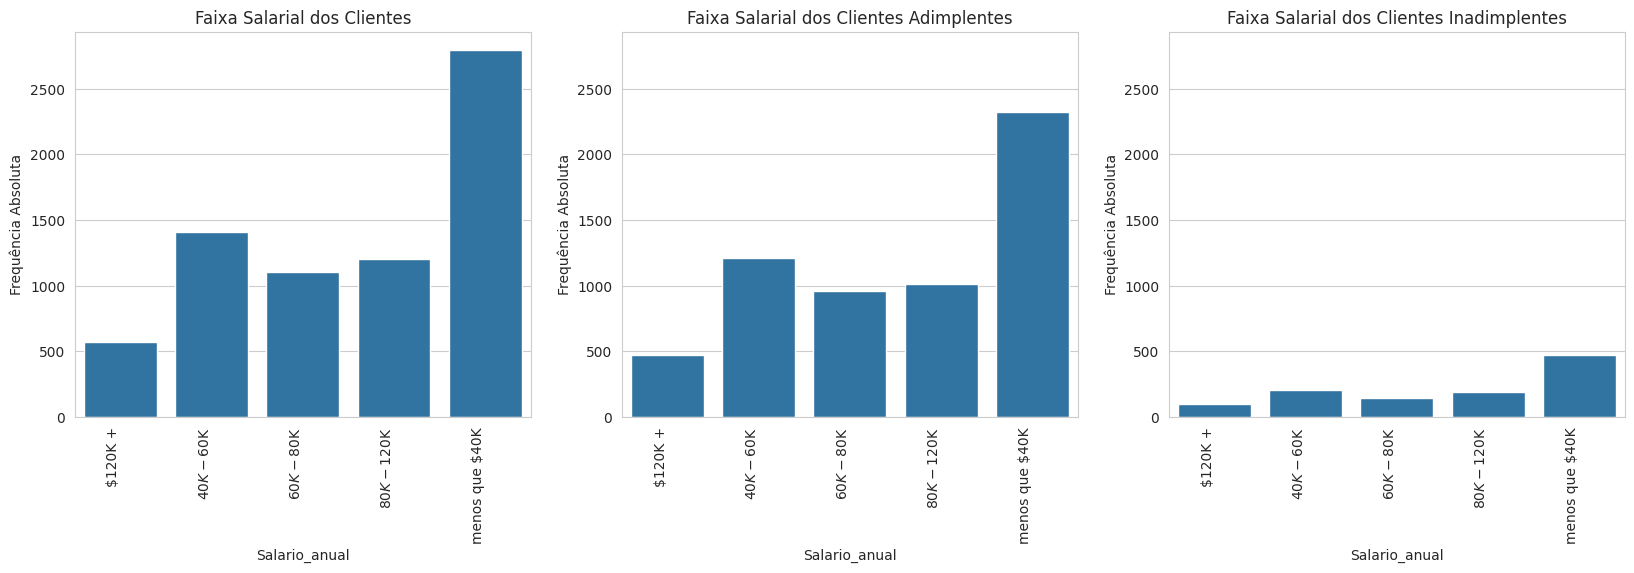

In [23]:
#Primeiramente, vamos explorar de acordo com o salario_anual
coluna = 'salario_anual'
titulos = ['Faixa Salarial dos Clientes', 'Faixa Salarial dos Clientes Adimplentes', 'Faixa Salarial dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max_freq = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.reset_index(inplace=True)
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta', 'index': coluna}, inplace=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

<ipython-input-24-bf873b5f6f51>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')
<ipython-input-24-bf873b5f6f51>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')
<ipython-input-24-bf873b5f6f51>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')


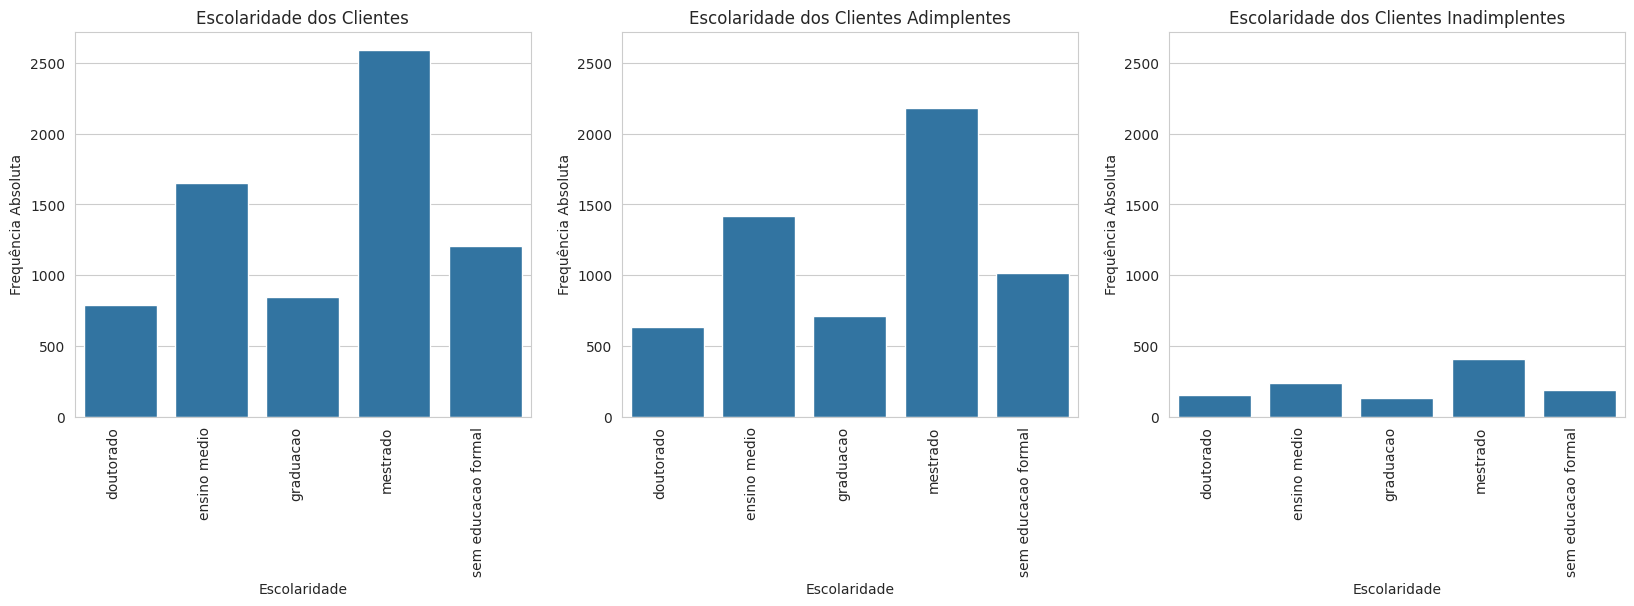

In [24]:
#Agora, vamos explorar de acordo com o grau de escolaridade
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max_freq = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.reset_index(inplace=True)
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta', 'index': coluna}, inplace=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

<ipython-input-25-aefe7184ebea>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')
<ipython-input-25-aefe7184ebea>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')
<ipython-input-25-aefe7184ebea>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')


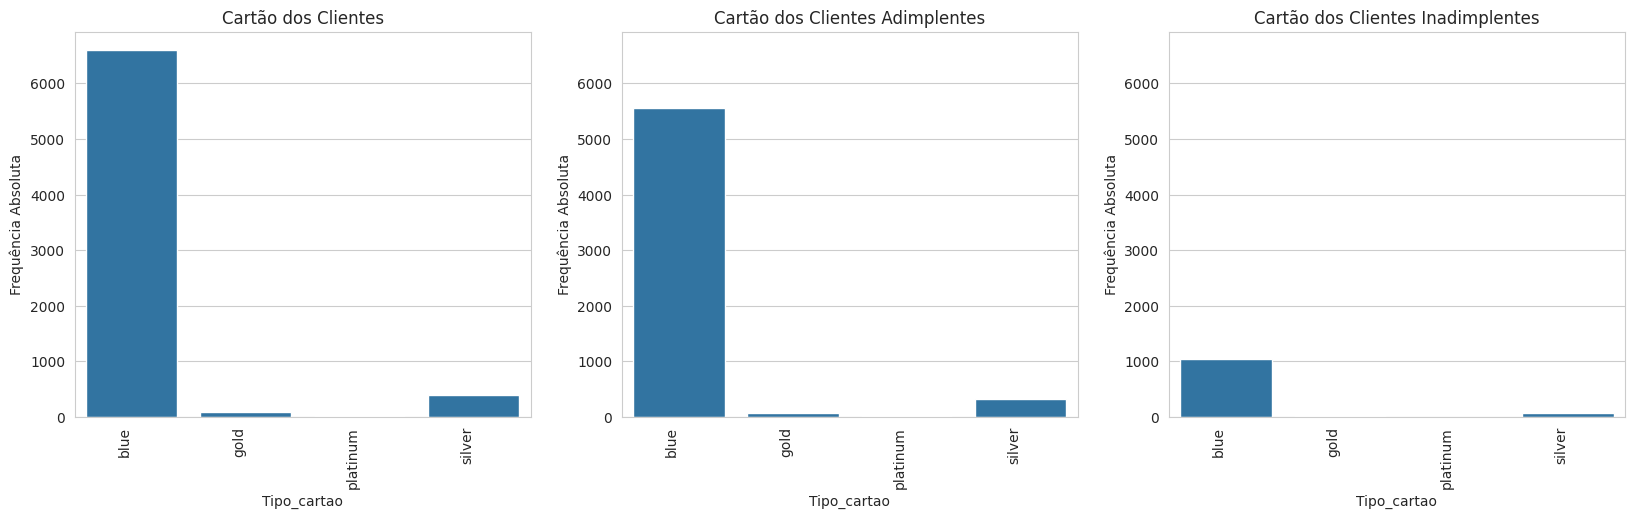

In [25]:
#E também de acordo com o tipo de cartão de cada cliente
coluna = 'tipo_cartao'
titulos = ['Cartão dos Clientes', 'Cartão dos Clientes Adimplentes', 'Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max_freq = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.reset_index(inplace=True)
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta', 'index': coluna}, inplace=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90, ha='right')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

Nenhuma dessas observações nos deu um claro indicativo sobre o comportamento dos inadimplentes. Com isso, vamos explorar então a parte numérica e ver se conseguimos ter algum insight.

**3.2 - VISUALIZAÇÕES NUMÉRICAS**

In [26]:
#Olhando quais variáveis numéricas podemos explorar
df.drop('id', axis=1).select_dtypes('number').head(n=5)

,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,3,39,5,3,1,12691.51,1144.90,42
1,0,49,5,44,6,2,1,8256.96,1291.45,33
2,0,51,3,36,4,0,1,3418.56,1887.72,20
4,0,40,3,21,5,0,1,4716.22,816.08,28
5,0,44,2,36,3,2,1,4010.69,1088.07,24


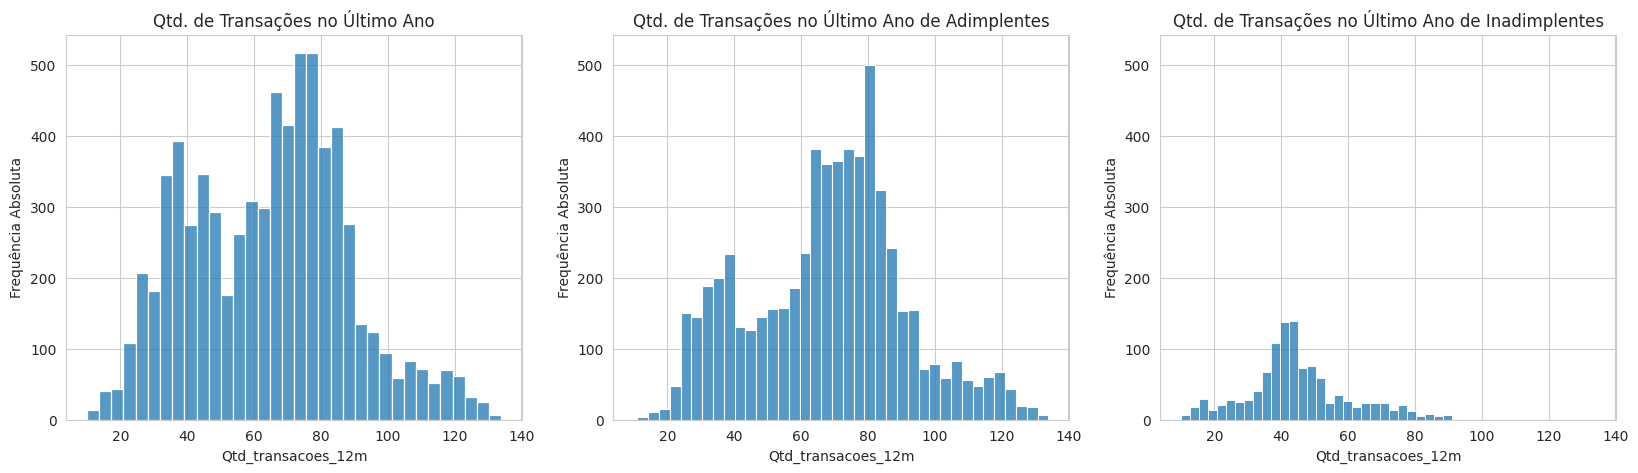

In [27]:
#Começando pela quantidade de transações nos últimos 12 meses

coluna = 'qtd_transacoes_12m'
titulos = [
 'Qtd. de Transações no Último Ano',
 'Qtd. de Transações no Último Ano de Adimplentes',
 'Qtd. de Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

# Nesta análise podemos ver que há uma concentração de inadimplentes principalmente entre a faixa de 30 a 50 quantidades de transações,
# enquanto a principal concentração de transações de clientes adimplentes fica entre 60 e 90.

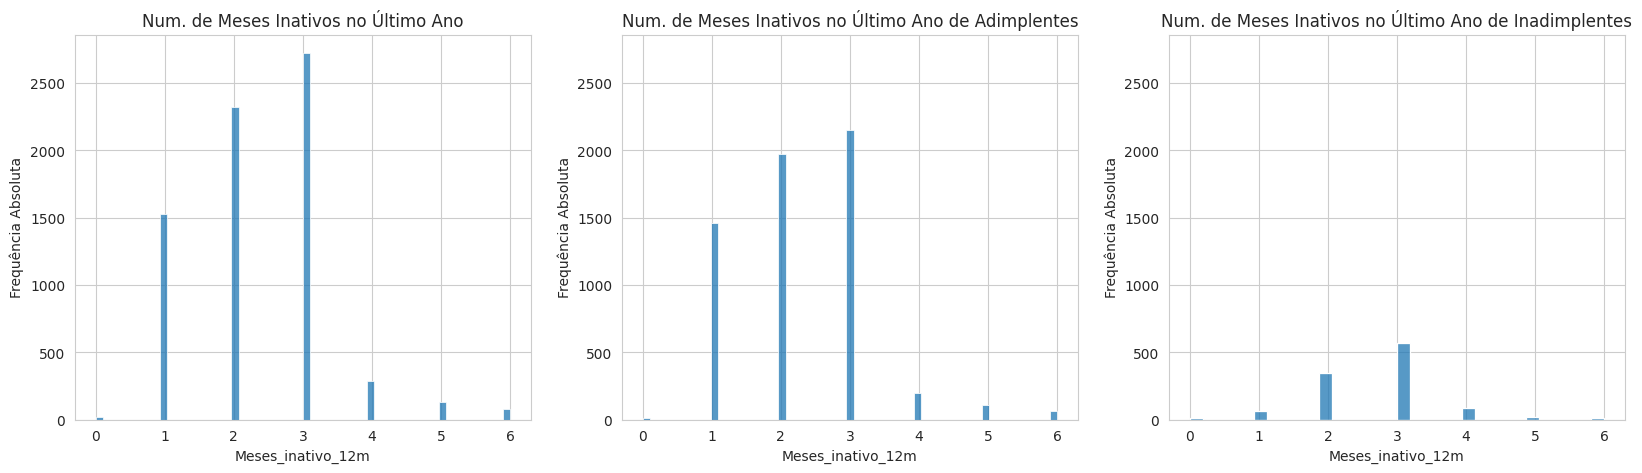

In [34]:
#Meses Inativos

coluna = 'meses_inativo_12m'
titulos = [
 'Num. de Meses Inativos no Último Ano',
 'Num. de Meses Inativos no Último Ano de Adimplentes',
 'Num. de Meses Inativos no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

# Apesar da diferença vista nas quantidades de transações, os meses de inatividade dos clientes
# não parece ser um diferencial para se tornar um inadimplente.

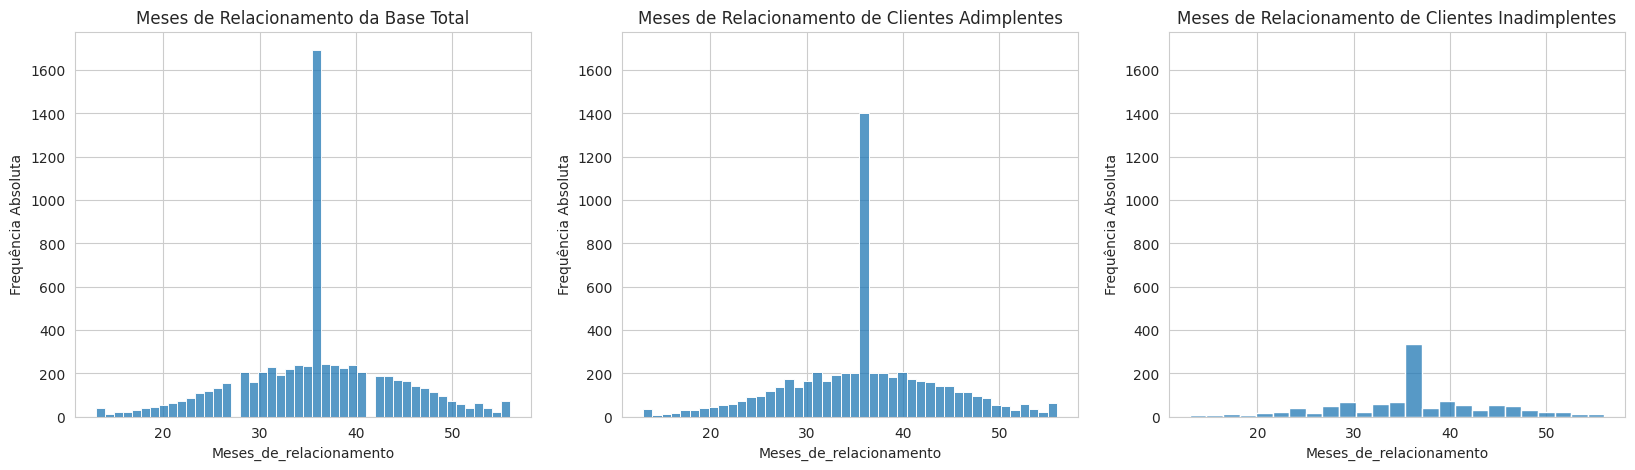

In [48]:
#Meses de relacionamento

coluna = 'meses_de_relacionamento'
titulos = [
 'Meses de Relacionamento da Base Total',
 'Meses de Relacionamento de Clientes Adimplentes',
 'Meses de Relacionamento de Clientes Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

# Assim como os meses inativos, o tempo de relacionamento parece pouco importar
# na hora de um cliente ser inadimplente ou não

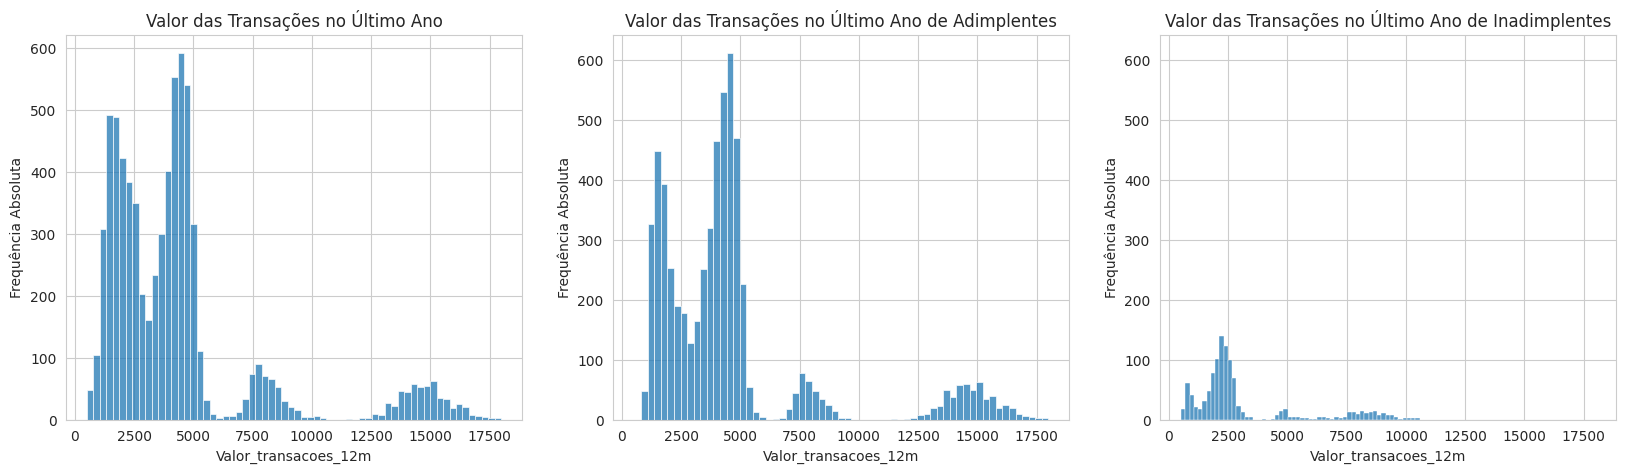

In [37]:
# Com relação ao valor das transações dos últimos 12 meses


coluna = 'valor_transacoes_12m'
titulos = [
 'Valor das Transações no Último Ano',
 'Valor das Transações no Último Ano de Adimplentes',
 'Valor das Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

# Com relação ao valor das transações, vemos que os inadmplentes se concentram na faixa de 2500,
# enquanto os adimplentes possuem 2 grandes picos em 2000 e 4500. Além disso, pode-se
# observar que são pouquíssimos os inadimplentes acima de 10.000, enquanto ainda há uma certa
# quantia, ainda que em minoria, de clientes adimplentes nessa faixa.

Após essa breve análise, 2 variáveis chamaram mais a nossa atenção:
'valor_transacoes_12m' e 'qtd_transacoes_12m'. Vamos então tentar visualizar as 2 simultaneamente e cruzar as informações.

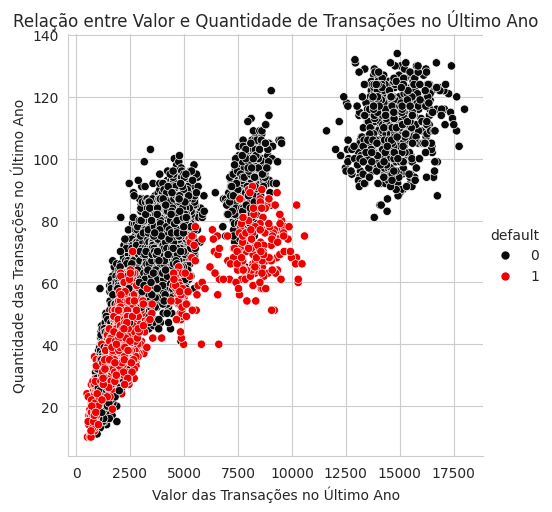

In [50]:
# Criaremos um gráfico com as variáveis em cada um dos eixos, separados pela coluna "default",
# que é a que nos indica quem são os clientes adimplentes e inadimplentes.
f = sns.relplot(
 x='valor_transacoes_12m',
 y='qtd_transacoes_12m',
 data=df,
 hue='default',
 palette=["#0A0A0A","#EE0000"]
)
_ = f.set(
 title='Relação entre Valor e Quantidade de Transações no Último Ano',
 xlabel='Valor das Transações no Último Ano',
 ylabel='Quantidade das Transações no Último Ano'
 )

# Ao cruzarmos as informações, percebemos que há entre 2 e 3 'clusters'.
# O localizado no canto superior direito é formado somente por clientes adimplentes,
# o que significa que os clientes inadimplentes estão limitados aos outros 2 clusters.
# Desta forma conseguimos ver principalmnte 2 concentrações de inadimplentes:
# Na faixa de 10 a 60 transações com valor de até 4500
# e outro na faixa de 50 a 90 transações com valor entre 7000 e 10000.

Com isso encerramos nosso exercício. Conseguimos identificar onde se encontram os grupos de inadimplentes a partir de 2 variáveis: Quantidade de Transações e Valor de Transações.

Para o futuro, cabe à instituição financeira estudar outros comportamentos dos clientes e entender o motivo pelo qual eles se tornam inadimplentes, e, a partir daí, criar planos específicos para os clientes que se encontram nessa faixa para que eles continuem gerando renda para a instituição.